In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score
from matplotlib_venn import venn2
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500

In [18]:
training_results = pd.read_csv("../data/IDX/conversion_results.csv")
training_results

,Unnamed: 0,Name,mz,rt_start,rt_end,Charge,Product mz,CE,RF Lens (V),Training,HRMS_CE,Converted_CE
0,0,Acetyl-CoA,808.118470,6.02,6.43,-1,461.167,34.74,168,1,30.0,33.595324
1,1,Acetyl-CoA,808.118470,6.02,6.43,-1,426.167,33.26,168,1,25.0,31.028229
2,2,Acetyl-CoA,808.118470,6.02,6.43,-1,408.113,35.24,168,1,30.0,33.595324
3,3,Acetyl-CoA,808.118470,6.02,6.43,-1,510.167,37.10,168,1,30.0,33.595324
4,4,Acetyl-CoA,808.118470,6.02,6.43,-1,728.250,34.49,168,1,30.0,33.595324
5,5,Adenine,134.047200,2.18,3.22,-1,107.054,17.17,63,1,30.0,15.432820
6,6,Adenine,134.047200,2.18,3.22,-1,92.042,19.20,63,1,40.0,20.567011
7,7,Adenine,134.047200,2.18,3.22,-1,65.196,28.08,63,1,60.0,30.835392
8,8,ADP,426.022110,6.96,7.77,-1,328.125,16.04,103,1,20.0,18.165744
9,9,ADP,426.022110,6.96,7.77,-1,408.185,18.69,103,1,25.0,20.732839


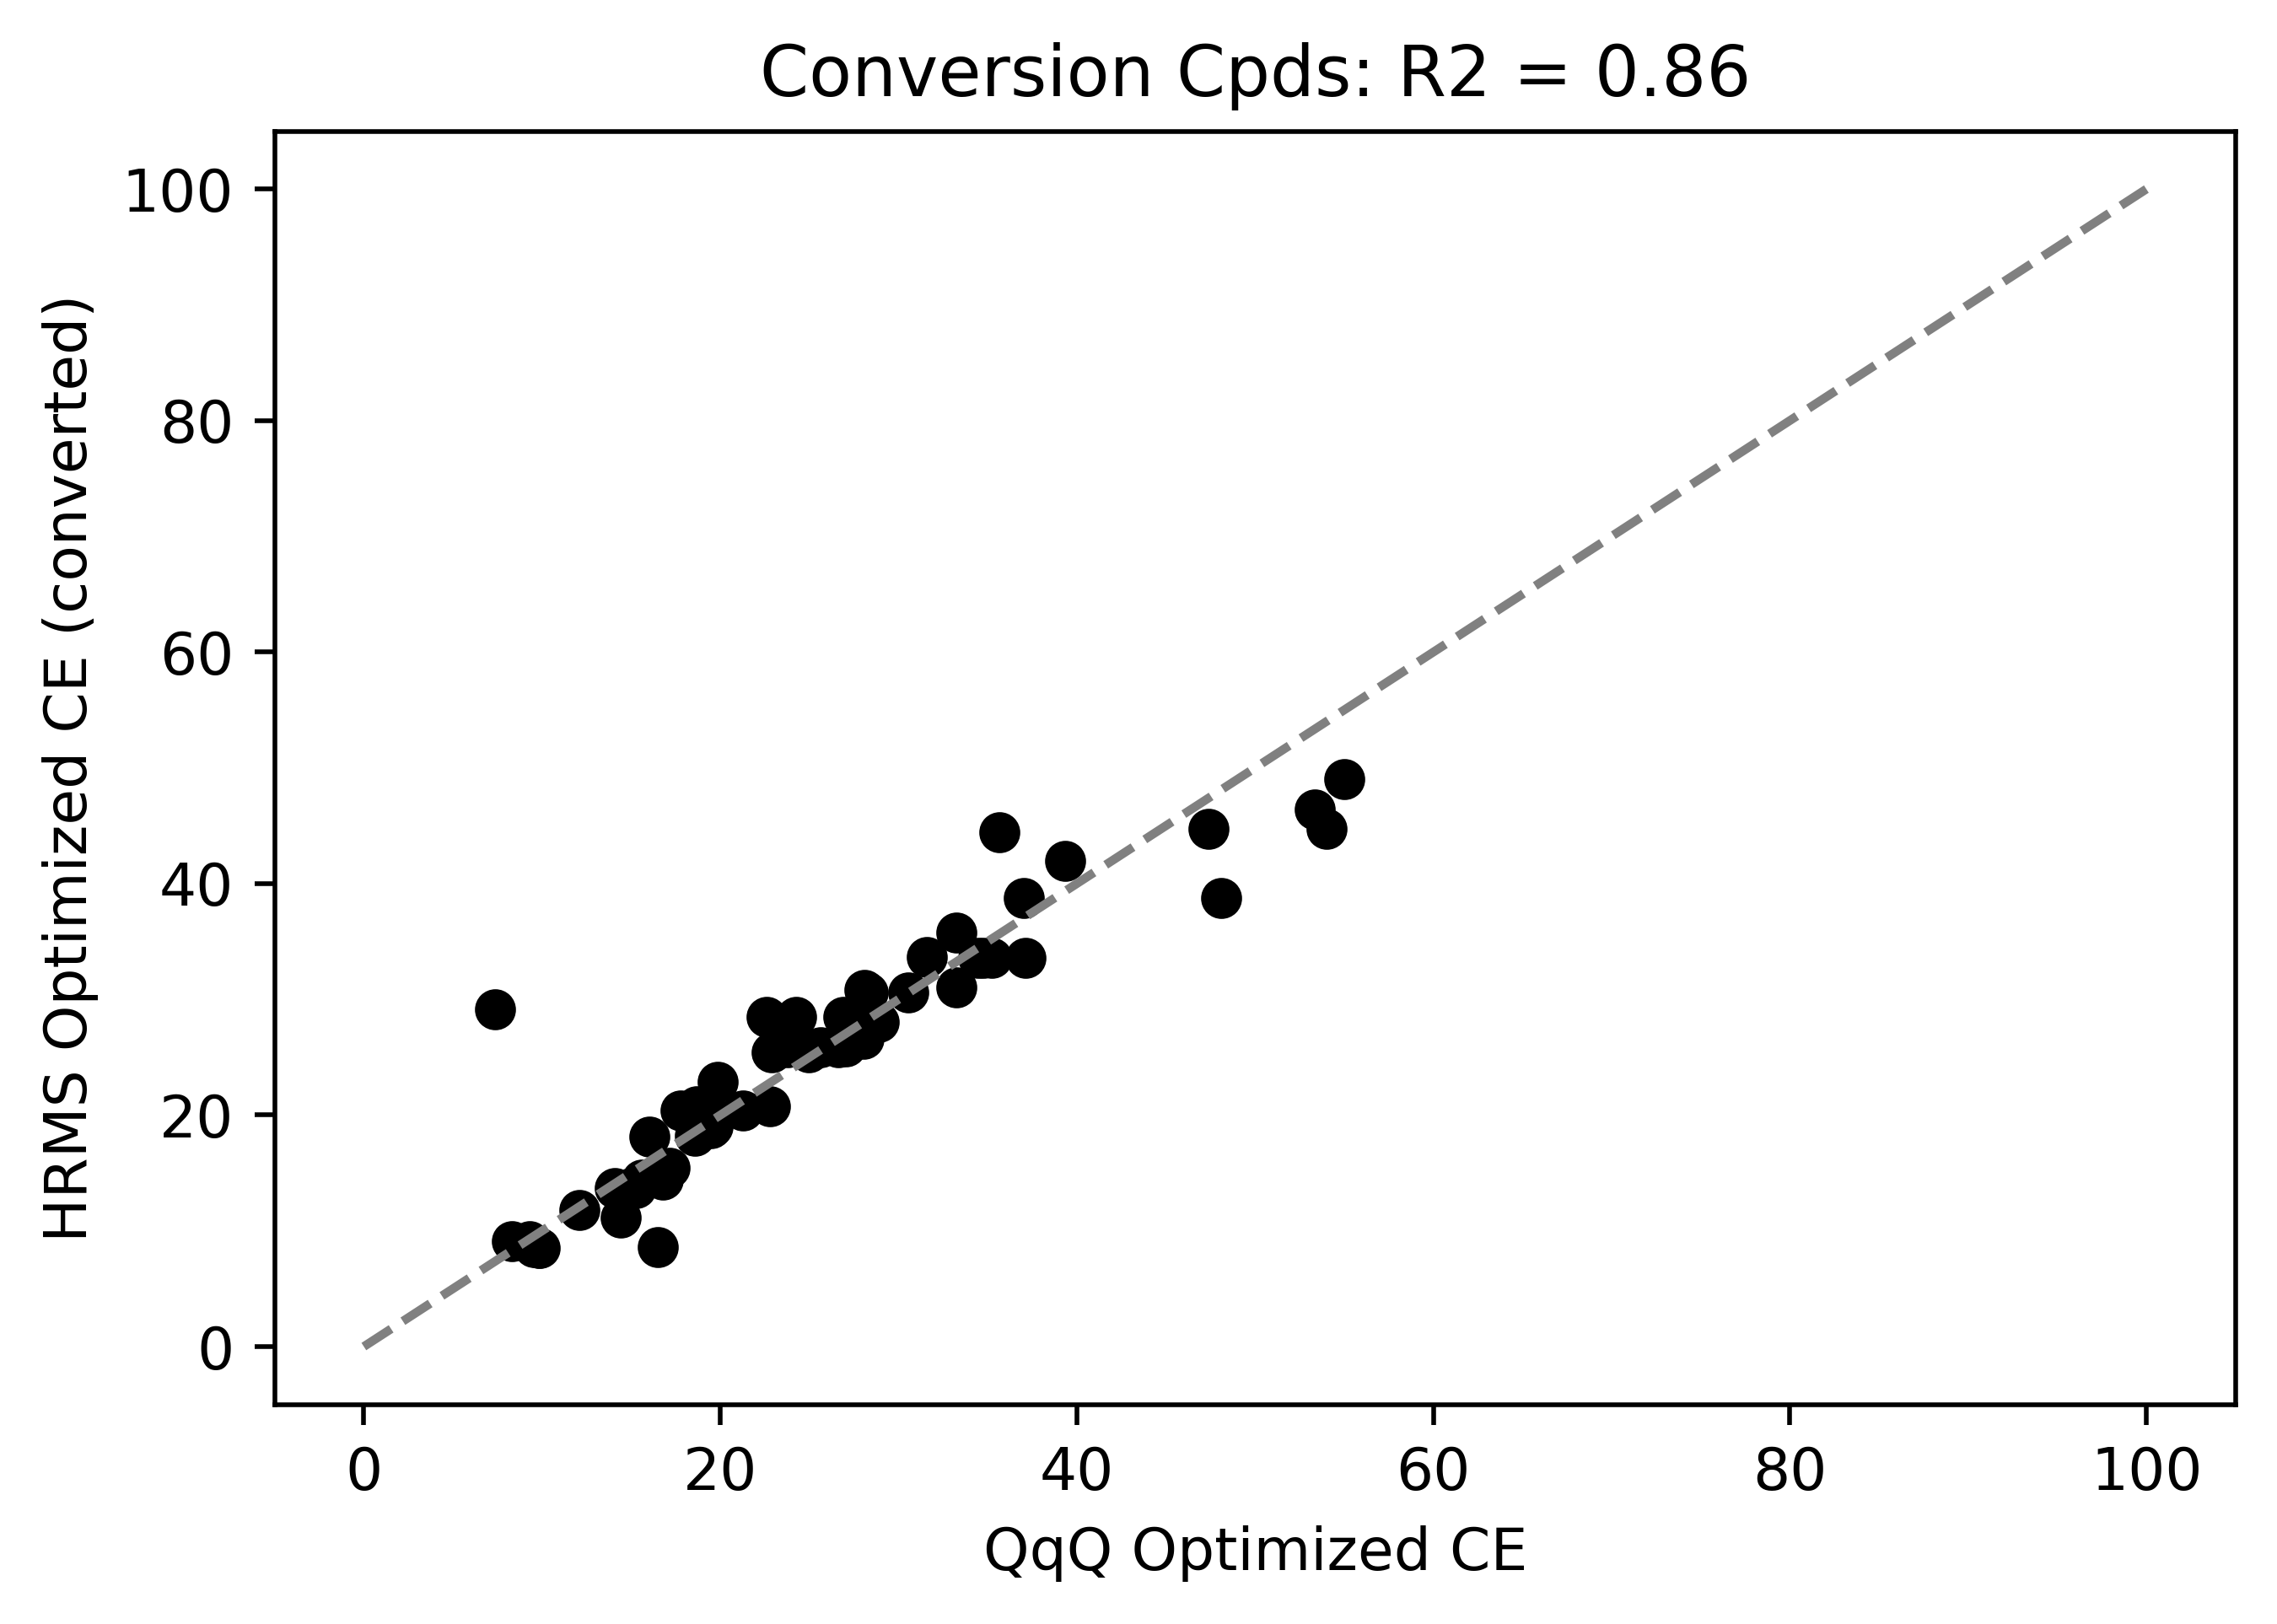

In [19]:
plt.scatter(training_results["CE"],training_results["Converted_CE"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(training_results["CE"],training_results["Converted_CE"])
plt.title("Conversion Cpds: R2 = "+str(np.round(r2,2)))
plt.savefig("training_scatter.png")

In [20]:
totalTransitionInfoFn = "../data/IDX/M3T_transitions_ALTIS_optimized_allCpds.csv"
totalTransitions = pd.read_csv(totalTransitionInfoFn)
totalTransitions = totalTransitions[totalTransitions["Product mz"] > 50]
totalTransitions

,Name,mz,rt_start,rt_end,Charge,Product mz,CE,RF Lens (V),Training
0,6-PGA,275.017336,8.53,8.92,-1,96.970,15.74,64,0
1,6-PGA,275.017336,8.53,8.92,-1,257.196,11.70,64,0
2,6-PGA,275.017336,8.53,8.92,-1,79.042,35.12,64,0
3,6-PGA,275.017336,8.53,8.92,-1,177.071,14.86,64,0
4,Acetoacetyl-CoA,850.129040,6.10,6.57,-1,766.167,28.55,149,0
...,...,...,...,...,...,...,...,...,...
286,UDP-N-acetyl-GN,608.088869,6.90,7.34,1,186.196,23.96,63,0
287,UDP-N-acetyl-GN,608.088869,6.90,7.34,1,168.125,29.01,63,0
288,Valine,118.086280,4.79,5.17,1,57.196,29.47,30,0
289,Valine,118.086280,4.79,5.17,1,55.071,20.88,30,0


In [21]:
resultData = pd.read_csv("../data/IDX/generated_SRM_table.csv")
resultData

,Unnamed: 0,Name,rt_start,rt_end,mz,Charge,Product mz,CE,Normalized Intensity
0,0,Acetoacetyl-CoA,6.10,6.57,852.14364,1,345.15,32.214464,1.417690e+06
1,1,Acetoacetyl-CoA,6.10,6.57,852.14364,1,428.04,29.647369,4.404560e+05
2,2,Acetoacetyl-CoA,6.10,6.57,852.14364,1,243.08,29.647369,3.194504e+05
3,3,Acetoacetyl-CoA,6.10,6.57,852.14364,1,261.13,37.348655,3.034221e+05
4,4,Acetoacetyl-CoA,6.10,6.57,852.14364,1,136.06,39.915750,2.814366e+05
...,...,...,...,...,...,...,...,...,...
385,385,Uracil,1.84,2.53,113.03458,1,70.03,17.433741,3.634142e+03
386,386,Uracil,1.84,2.53,113.03458,1,95.06,9.732456,2.745215e+03
387,387,Uracil,1.84,2.53,113.03458,1,96.01,12.299551,2.363619e+03
388,388,Uracil,1.84,2.53,113.03458,1,84.08,25.135027,1.726087e+03


In [22]:
evalData = totalTransitions[totalTransitions["Training"] < .5]
fragTol = .5

transition_indices = {}
for index,row in evalData.iterrows():
    new = True
    for x in transition_indices:
        if x[0] == row["Name"] and np.abs(row["Product mz"] - x[1]) < fragTol and row["Charge"] == x[2]:
            new = False
            transition_indices[x]["QqQ Optimized CE"] = row["CE"]
            break
    if new:
        transition_indices[(row["Name"],row["Product mz"],row["Charge"])] = {"QqQ Optimized CE":row["CE"]}
        
for index,row in resultData.iterrows():
    if any((row["Name"],row["Charge"]) == (row2["Name"],row2["Charge"]) for _,row2 in evalData.iterrows()):
        new = True
        for x in transition_indices:
            if x[0] == row["Name"] and np.abs(row["Product mz"] - x[1]) < fragTol and row["Charge"] == x[2]:
                new = False
                transition_indices[x]["HRMS Optimized CE (converted)"] = row["CE"]
                break
        if new:
            transition_indices[(row["Name"],row["Product mz"],row["Charge"])] = {"HRMS Optimized CE (converted)":row["CE"]}
evaluation_results = pd.DataFrame.from_dict(transition_indices,orient="index")
evaluation_results

QqQ Optimized CE  HRMS Optimized CE (converted)
6-PGA           96.970  -1             15.74                      14.096998
                257.196 -1             11.70                       8.962808
                79.042  -1             35.12                      39.767950
                177.071 -1             14.86                            NaN
Acetoacetyl-CoA 766.167 -1             28.55                      29.593087
...                                      ...                            ...
Dopamine        67.030   1               NaN                      18.539859
Serotonine      78.990   1               NaN                      26.861298
Uracil          95.060   1               NaN                       9.732456
                84.080   1               NaN                      25.135027
                55.020   1               NaN                      17.433741

[336 rows x 2 columns]

163


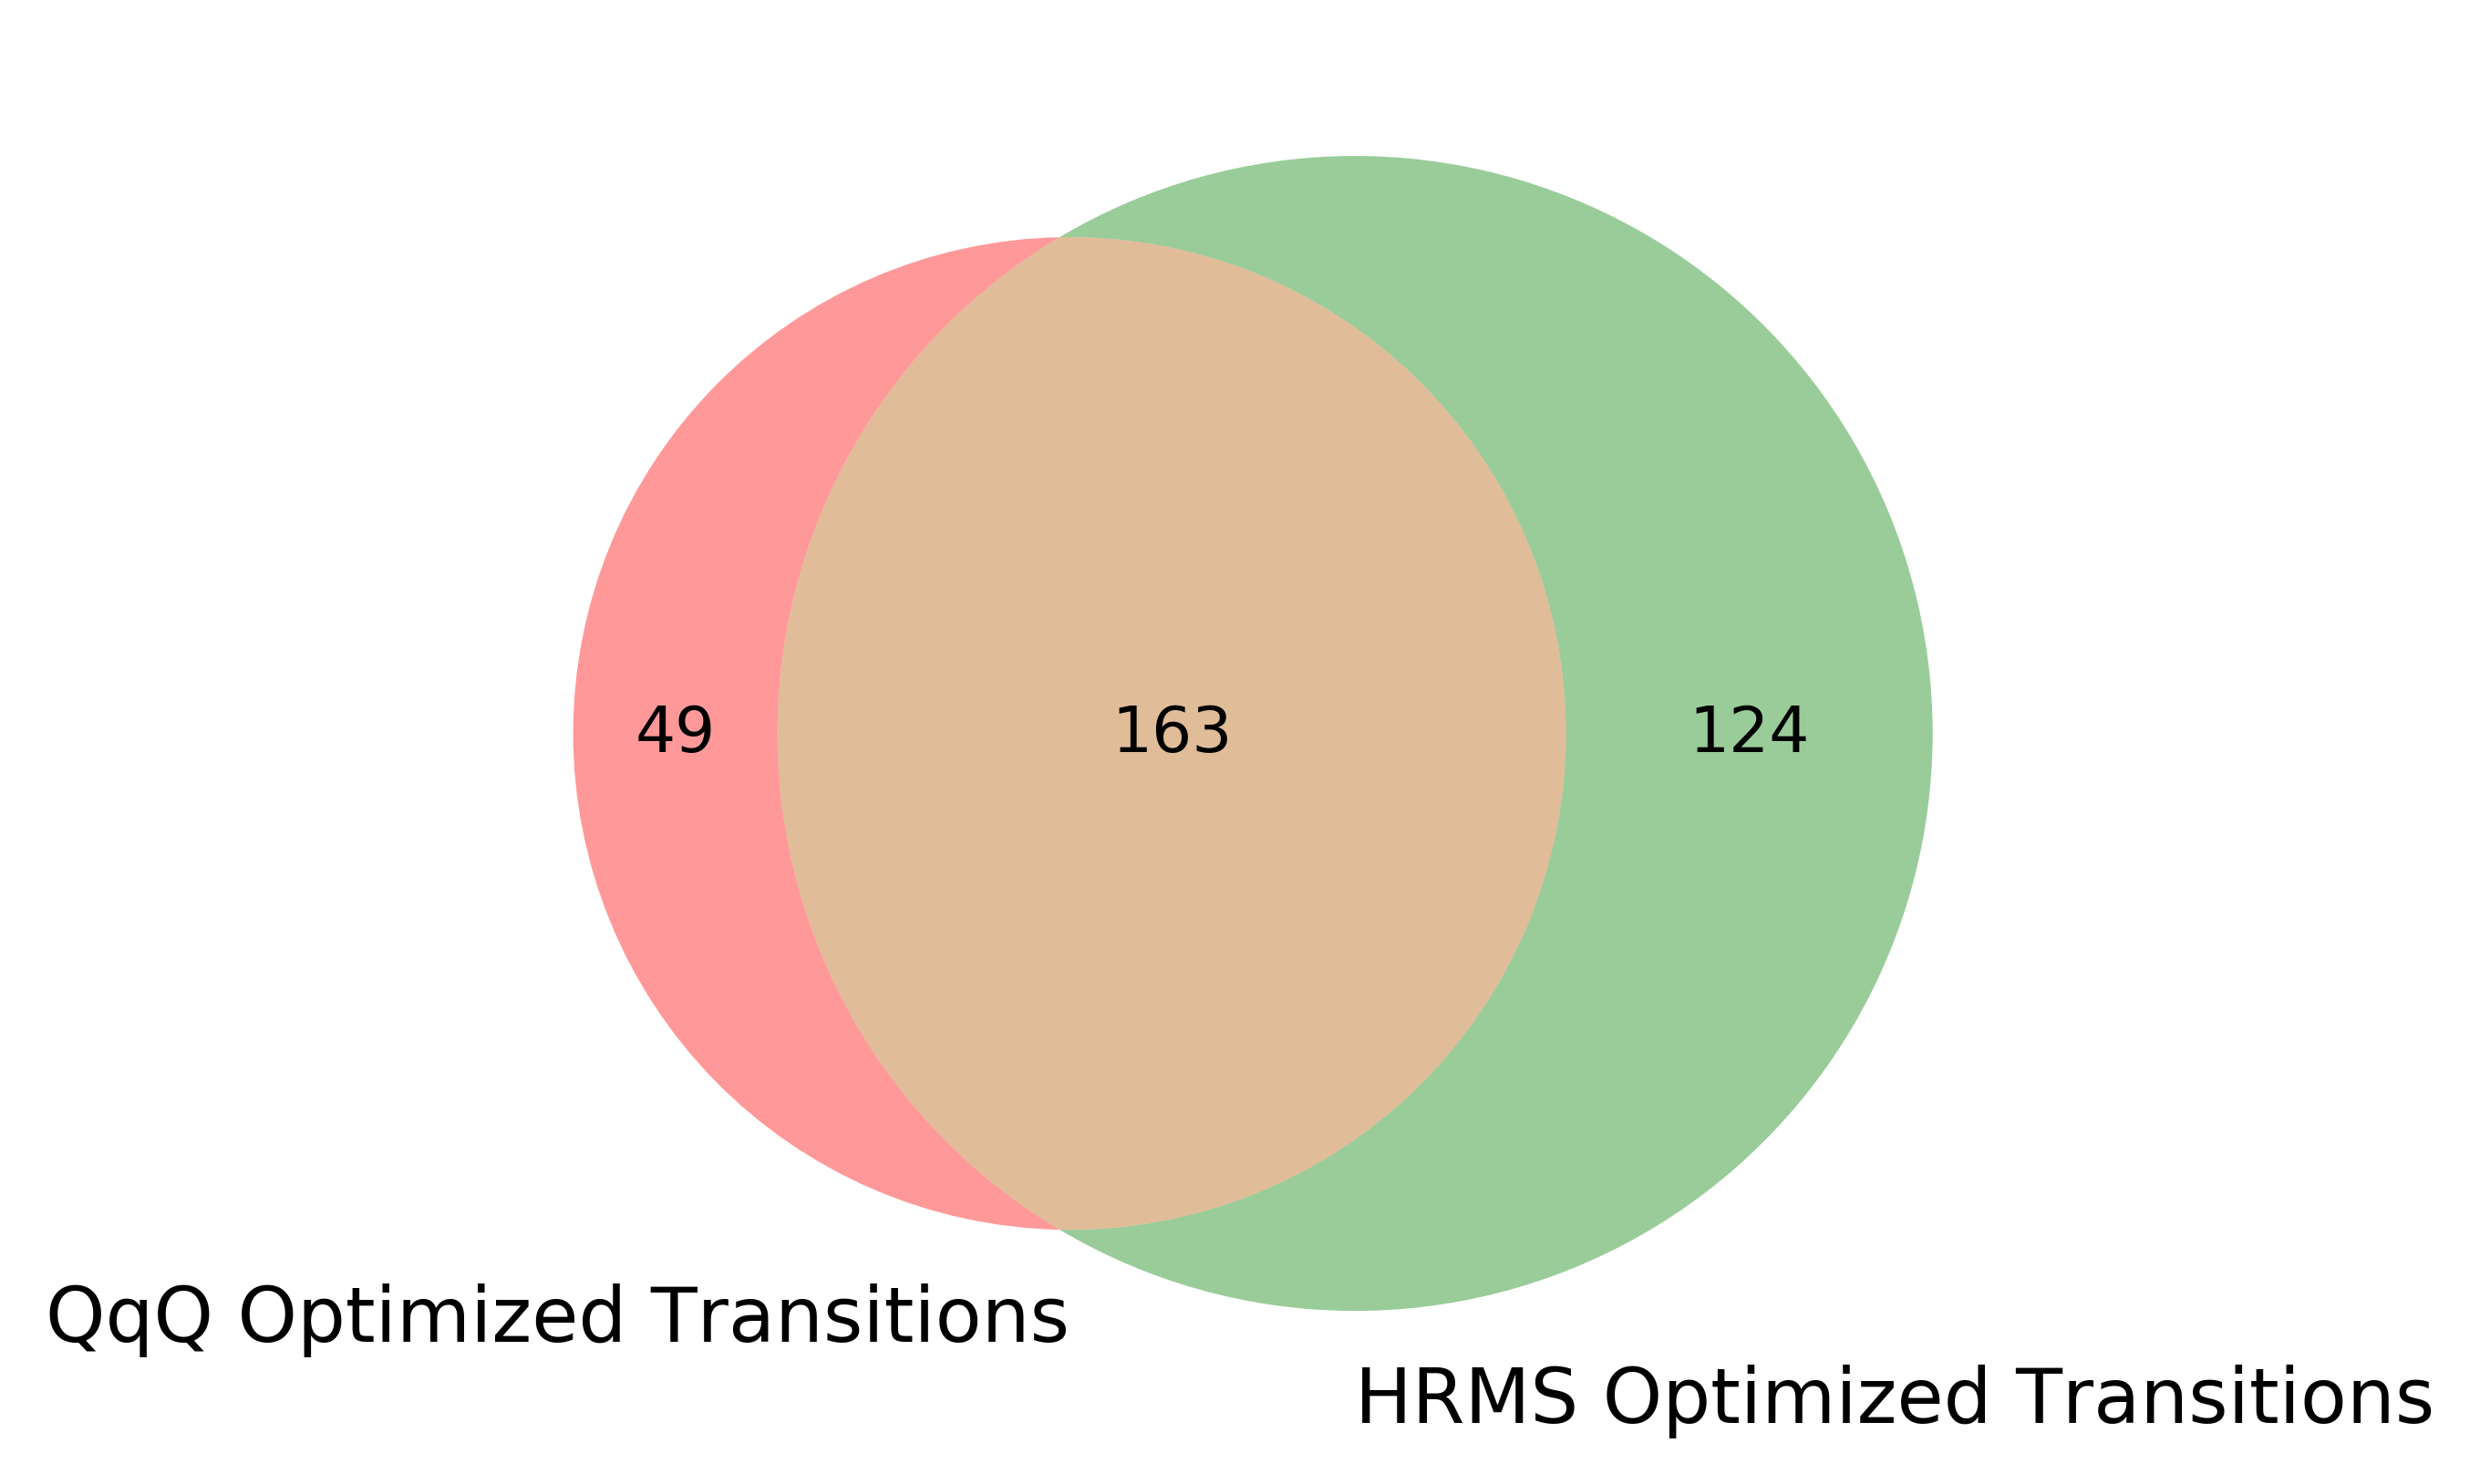

In [23]:
sharedInds = []
QqQ_trans = []
HRMS_trans = []

for index,row in evaluation_results.iterrows():
    if not (pd.isna(row["QqQ Optimized CE"]) or pd.isna(row["HRMS Optimized CE (converted)"])):
        sharedInds.append(index)
    if not pd.isna(row["QqQ Optimized CE"]):
        QqQ_trans.append(index)
    if not pd.isna(row["HRMS Optimized CE (converted)"]):
        HRMS_trans.append(index)
print(len(sharedInds))
filt = evaluation_results.loc[sharedInds,:]

venn2([set(QqQ_trans),set(HRMS_trans)],set_labels=["QqQ Optimized Transitions","HRMS Optimized Transitions"])
plt.savefig("venn.png")

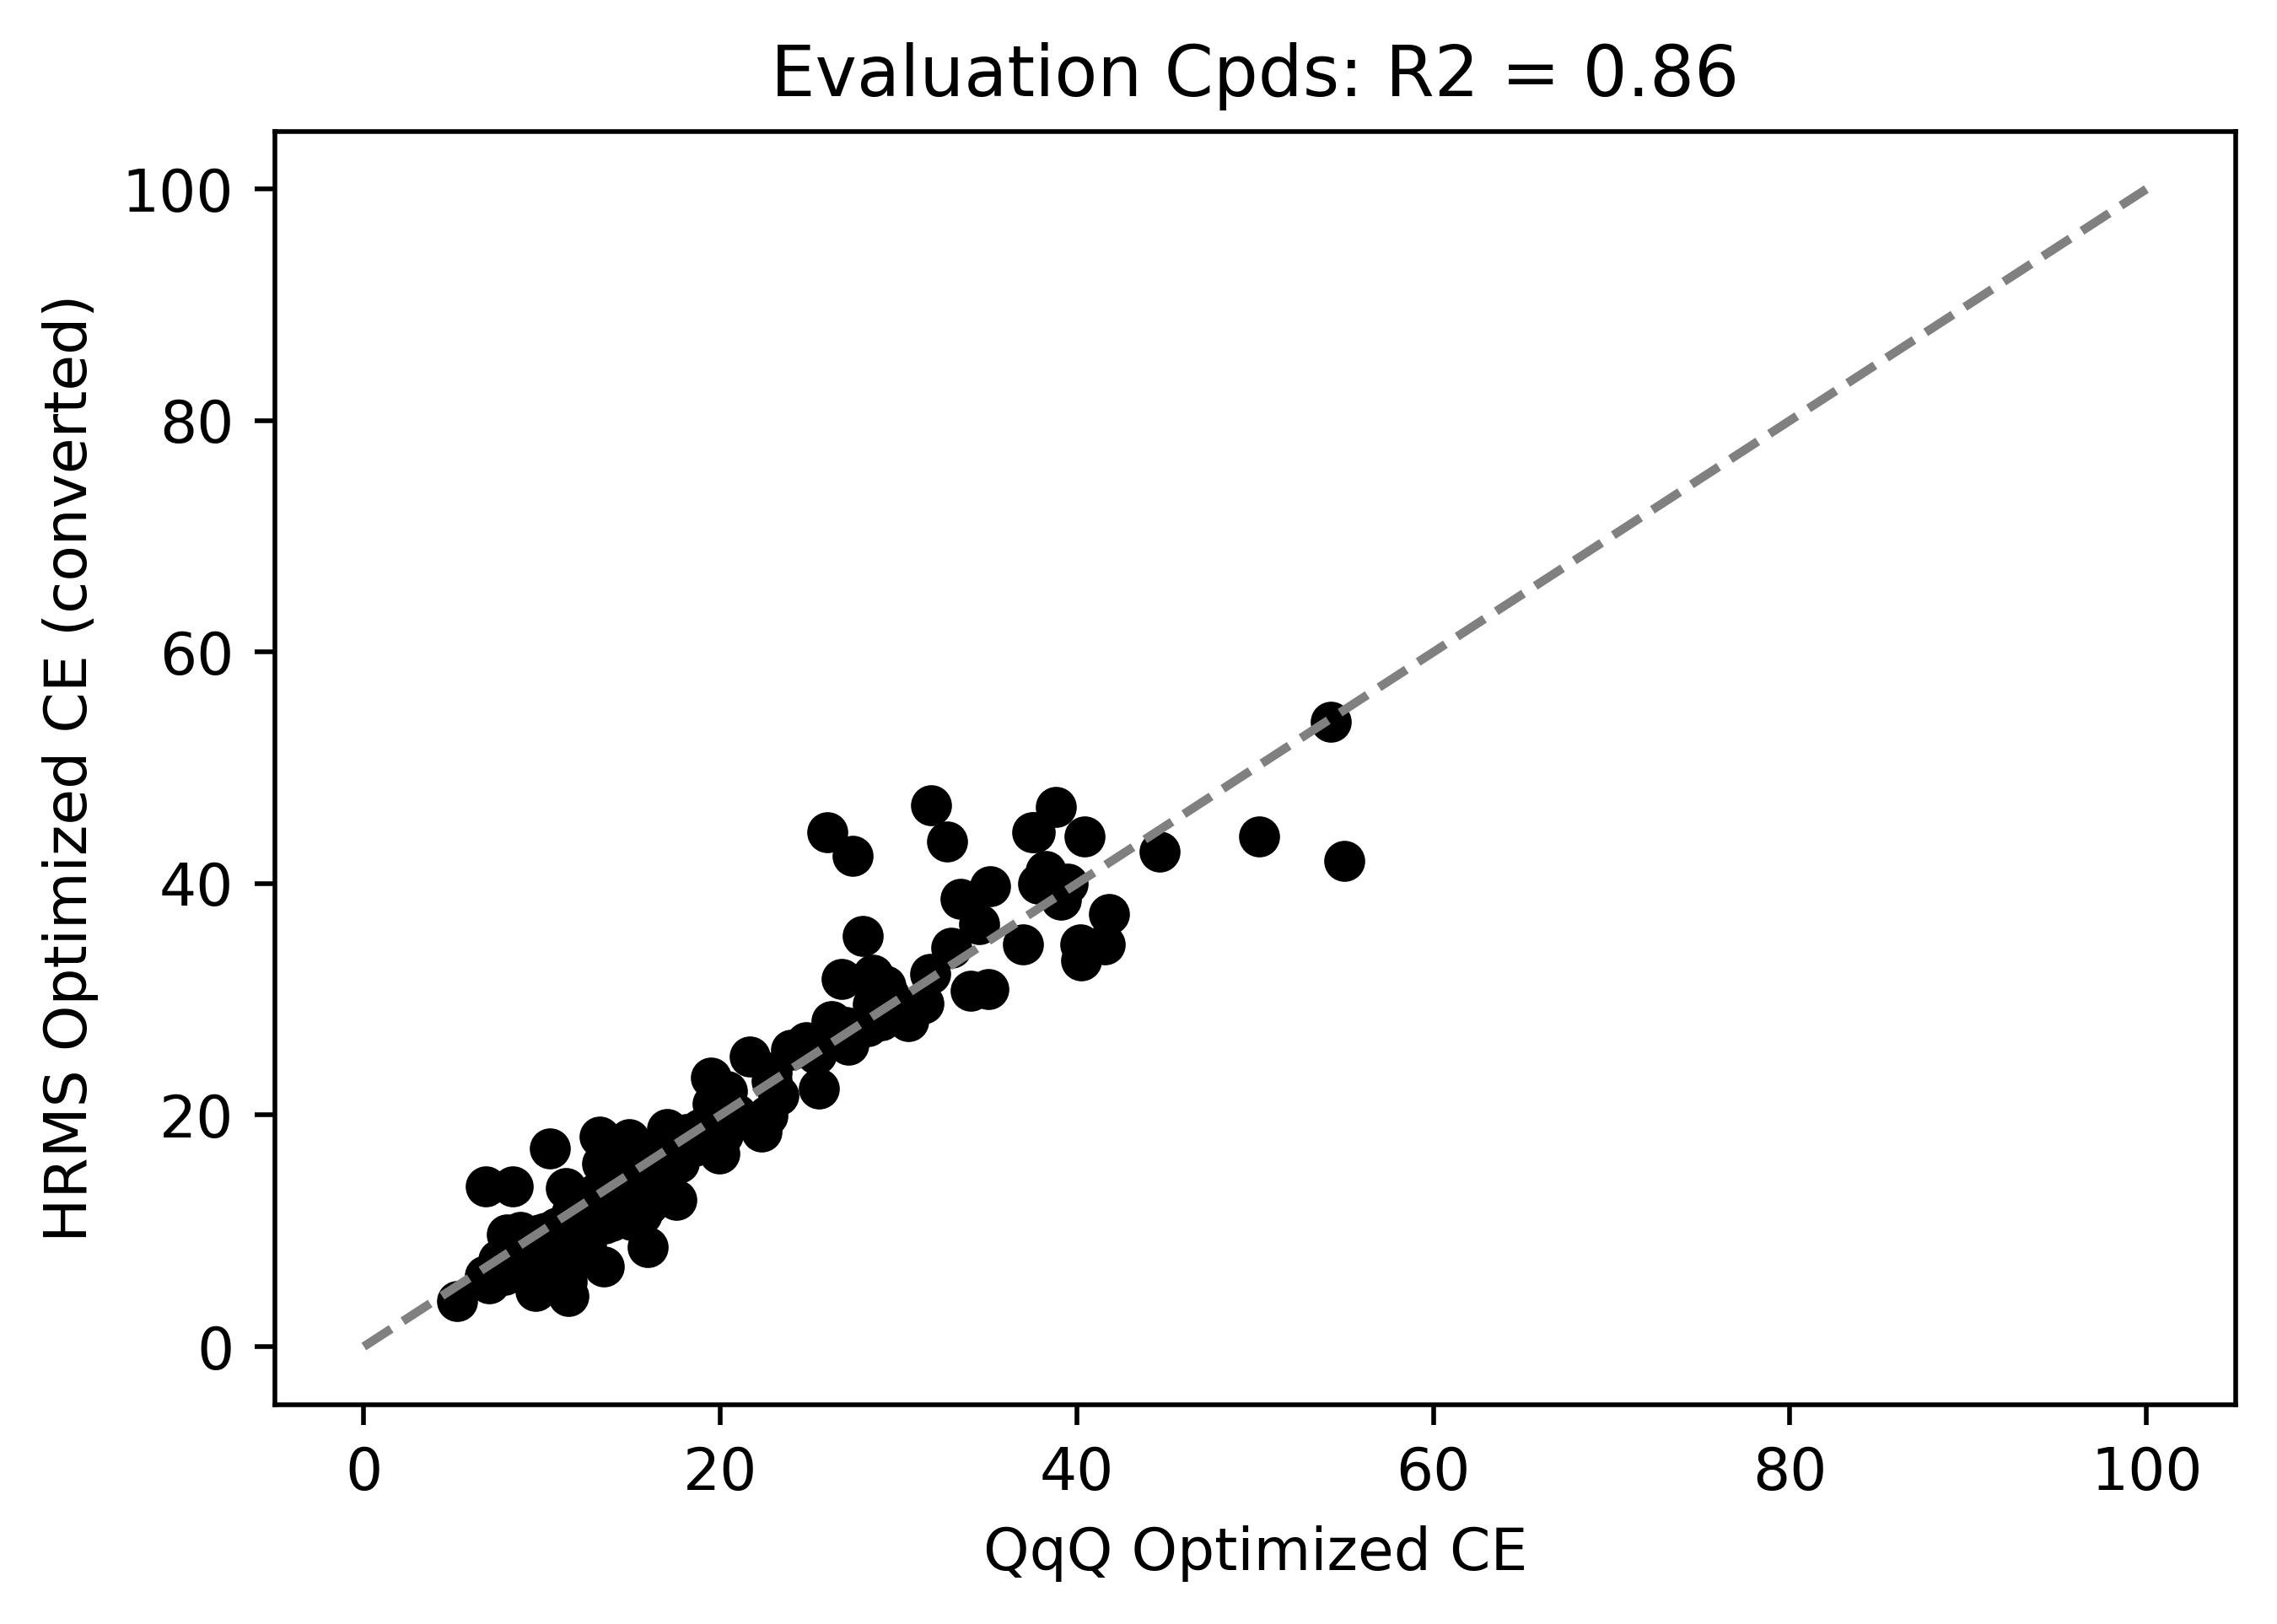

In [24]:
plt.scatter(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"])
plt.title("Evaluation Cpds: R2 = "+str(np.round(r2,2)))
plt.savefig("evaluation_scatter.png")

In [13]:
poorPerformers = []
for index,row in filt.iterrows():
    if np.abs(row["QqQ Optimized CE"] - row["HRMS Optimized CE (converted)"]) > 10:
        poorPerformers.append(index)
filt.loc[poorPerformers,:]

,,,QqQ Optimized CE,HRMS Optimized CE (converted)
Chelidamate,66.196,-1,27.41,42.396092
cGMP,79.042,-1,31.83,46.761924
G1P,78.970,-1,25.98,44.471165
PEP,63.030,-1,55.00,41.990997
R5P,79.042,-1,32.72,43.662546
